<a href="https://colab.research.google.com/github/rbbh/ARIMA-SVR-PSO-ensemble/blob/master/30_Experiments_of_ARIMA_%2B_(SVR_%2B_PSO).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from sklearn import svm
from mpl_toolkits.mplot3d import axes3d, Axes3D
from google.colab import files

In [0]:
import io
import pandas as pd

In [3]:
uploaded = files.upload()   

Saving airlines2.txt to airlines2.txt


In [0]:
data = pd.read_csv(io.BytesIO(uploaded['airlines2.txt']))

In [5]:
uploaded = files.upload()

Saving airlines2_ARIMA.txt to airlines2_ARIMA.txt


In [0]:
data_ARIMA = pd.read_csv(io.BytesIO(uploaded['airlines2_ARIMA.txt']))

In [7]:
uploaded = files.upload()

Saving airlines2_r.txt to airlines2_r.txt


In [0]:
data_r = pd.read_csv(io.BytesIO(uploaded['airlines2_r.txt']))

In [9]:
data_r.describe()

,Residuo
count,144.000000
mean,2.832599
std,29.757948
min,-86.729834
25%,-15.400285
50%,0.233500
75%,24.658117
max,81.595276


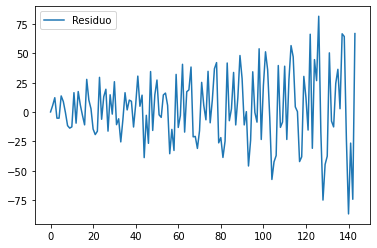

In [10]:
data_r.plot()

In [11]:
len(data)

144

In [0]:
#Scaling the data
from sklearn import preprocessing

data_r_n = data_r.copy()

data_r_n = (data_r - data_r.min())/(data_r.max() - data_r.min())

data_r_n = pd.DataFrame(data_r_n)



In [13]:
# TODO: Create function for the Lag used for the prediction
# We will use 12 for the lag dimension if the series repeats 
# itself annually, 3 if it is trimestrial etc.

# Note: For the "ONS" data base, make "dimensions" = 3
# NOTE: For the "Milk" data base, make "dimensions" = 24

dimensions = 12
data_cn = pd.concat([data_r_n.shift(i) for i in range(0 + dimensions + 1)], axis = 1)

print(data_cn)

      Residuo   Residuo   Residuo  ...   Residuo   Residuo   Residuo
0    0.515917       NaN       NaN  ...       NaN       NaN       NaN
1    0.548651  0.515917       NaN  ...       NaN       NaN       NaN
2    0.587900  0.548651  0.515917  ...       NaN       NaN       NaN
3    0.484460  0.587900  0.548651  ...       NaN       NaN       NaN
4    0.484363  0.484460  0.587900  ...       NaN       NaN       NaN
..        ...       ...       ...  ...       ...       ...       ...
139  0.376937  0.897451  0.911189  ...  0.250371  0.070000  0.413713
140  0.000000  0.376937  0.897451  ...  0.292054  0.250371  0.070000
141  0.358242  0.000000  0.376937  ...  0.814766  0.292054  0.250371
142  0.073976  0.358242  0.000000  ...  0.469495  0.814766  0.292054
143  0.912230  0.073976  0.358242  ...  0.440188  0.469495  0.814766

[144 rows x 13 columns]


In [14]:
# Splitting the residual data into train, validation and test

from sklearn.model_selection import train_test_split

X = data_cn.iloc[12:,1:]

y = data_cn.iloc[12:,0]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3939, shuffle = False)

X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size = 0.5384, shuffle = False)


print(len(y_val))
print(len(y_test))
print(len(y_train))


24
28
80


In [15]:
dimensions = 12
data_c2n = pd.concat([data_ARIMA.shift(i) for i in range(0 + dimensions + 1)], axis = 1)

print(data_c2n)

          ARIMA       ARIMA       ARIMA  ...       ARIMA       ARIMA       ARIMA
0    111.888000         NaN         NaN  ...         NaN         NaN         NaN
1    112.378158  111.888000         NaN  ...         NaN         NaN         NaN
2    119.771433  112.378158  111.888000  ...         NaN         NaN         NaN
3    134.183102  119.771433  112.378158  ...         NaN         NaN         NaN
4    126.199377  134.183102  119.771433  ...         NaN         NaN         NaN
..          ...         ...         ...  ...         ...         ...         ...
139  629.281833  557.666302  468.353843  ...  451.586191  537.947070  576.091574
140  594.729834  629.281833  557.666302  ...  399.569768  451.586191  537.947070
141  487.428775  594.729834  629.281833  ...  354.584335  399.569768  451.586191
142  464.277816  487.428775  594.729834  ...  424.702000  354.584335  399.569768
143  365.178562  464.277816  487.428775  ...  403.635172  424.702000  354.584335

[144 rows x 13 columns]


In [16]:
# Splitting the ARIMA predictions into train, validation and test

from sklearn.model_selection import train_test_split

X_ARIMA = data_c2n.iloc[12:,1:]

y_ARIMA = data_c2n.iloc[12:,0]

X_train_ARIMA, X_val_ARIMA, y_train_ARIMA, y_val_ARIMA = train_test_split(X_ARIMA, y_ARIMA, test_size = 0.3939, shuffle = False)

X_val_ARIMA, X_test_ARIMA, y_val_ARIMA, y_test_ARIMA = train_test_split(X_val_ARIMA, y_val_ARIMA, test_size = 0.5384, shuffle = False)

print(len(y_val_ARIMA))
print(len(y_test_ARIMA))
print(len(y_train_ARIMA))

24
28
80


In [17]:
dimensions = 12
data_c3n = pd.concat([data.shift(i) for i in range(0 + dimensions + 1)], axis = 1)

print(data_c3n)

       X      X      X      X      X  ...      X      X      X      X      X
0    112    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
1    118  112.0    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
2    132  118.0  112.0    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
3    129  132.0  118.0  112.0    NaN  ...    NaN    NaN    NaN    NaN    NaN
4    121  129.0  132.0  118.0  112.0  ...    NaN    NaN    NaN    NaN    NaN
..   ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
139  606  622.0  535.0  472.0  461.0  ...  405.0  362.0  407.0  463.0  559.0
140  508  606.0  622.0  535.0  472.0  ...  417.0  405.0  362.0  407.0  463.0
141  461  508.0  606.0  622.0  535.0  ...  391.0  417.0  405.0  362.0  407.0
142  390  461.0  508.0  606.0  622.0  ...  419.0  391.0  417.0  405.0  362.0
143  432  390.0  461.0  508.0  606.0  ...  461.0  419.0  391.0  417.0  405.0

[144 rows x 13 columns]


In [18]:
# Splitting the raw data into train, validation and test

from sklearn.model_selection import train_test_split

X_raw = data_c3n.iloc[12:,1:]

y_raw = data_c3n.iloc[12:,0]

X_train_raw, X_val_raw, y_train_raw, y_val_raw = train_test_split(X_raw, y_raw, test_size = 0.3939, shuffle = False)

X_val_raw, X_test_raw, y_val_raw, y_test_raw = train_test_split(X_val_raw, y_val_raw, test_size = 0.5384, shuffle = False)

print(len(y_val_raw))
print(len(y_test_raw))
print(len(y_train_raw))

24
28
80


In [0]:
def pso(n_particles, iterations, dimensions, inertia, experiments):

    # Range of SVR's hyperparameters (Particles' search space)
    # C, Epsilon and Gamma
    max_c = 1e4
    min_c = 1e-3
    max_e = 1e-1
    min_e = 1e-8
    max_g = 1e3
    min_g = 1e-3
    

    # Initializing regression variables    
    p_best_RGS = np.empty((n_particles), dtype = object);
    g_best_RGS = sys.maxsize

    # Initializing variables for experiment collection
    g_bests = []
    g_bests_RGS_experiment = []
    mse_residuals = []
    final_experiment_predictions = []

    last_configurations = []
    
    average_particles = []
    mse_averages = []
    final_experiment_averages = []

    median_particles = []
    mse_medians = []
    final_experiment_medians = []
    
    mse_ARIMA = []
    mse_ensemble = []


    from sklearn.metrics import mean_squared_error

    for e in range(experiments):
      
        # Initializing particles' positions randomly, inside
        # the search space
        x = np.random.rand(n_particles, 1)*(max_c - min_c) + min_c
        y = np.random.rand(n_particles, 1)*(max_e - min_e) + min_e
        z = np.random.rand(n_particles, 1)*(max_g - min_g) + min_g

        c = np.concatenate((x,y,z), axis=1)

        if(e == 0):
            # Displaying tridimensional search space
            plot(c)

        # Initializing particles' parameters
        v = np.zeros((n_particles, dimensions))
        c1 = 2
        c2 = 2
        p_best = np.zeros((n_particles, dimensions))
        p_best_val = np.zeros(n_particles) + sys.maxsize  
        g_best = np.zeros(dimensions)
        g_best_val = sys.maxsize

        best_iter = np.zeros(iterations)

        for i in range(iterations):

            for j in range(n_particles):
              # Starting Regression
              rgs = svm.SVR(C = c[j][0], epsilon = c[j][1], gamma = c[j][2])

              # Fitting the curve
              rgs.fit(X_train, y_train)
              y_predict = rgs.predict(X_val)

              # Using Mean Squared Error to verify prediction accuracy
              mse = mean_squared_error(y_val, y_predict) 

              # If mse value for that search point, for that particle,
              # is less than its personal best point,
              # replace personal best
              if(mse < p_best_val[j]):   
                  # The value below represents the current least Mean Squared Error
                  p_best_val[j] = mse
                  
                  # The value below represents the current least Regressor
                  p_best_RGS[j] = rgs
                              

                  # The value below represents the current search coordinates for
                  # the particle's current least Mean Squared Error found
                  p_best[j] = c[j].copy()
                  
              # Using auxiliar variable to get the index of the
              # particle that found the configuration with the 
              # minimum MSE value
              aux = np.argmin(p_best_val)        
            
              if(p_best_val[aux] < g_best_val):
                  # Assigning Particle's current best MSE to the Group's best    
                  g_best_val = p_best_val[aux]

                  # Assigning Particle's current best configuration to the Group's best
                  g_best = p_best[aux].copy()

                  # Group best regressor:
                  # the combination of C, Epsilon and Gamma
                  # that computes the best fitting curve
                  g_best_RGS = p_best_RGS[aux]

            
              rand1 = np.random.random()
              rand2 = np.random.random()

              # The variable below influences directly the particle's velocity.
              # It can either make it smaller or bigger. 
              w = inertia

              # The equation below represents Particle's velocity, which is
              # the rate of change in its position
              v[j] = w*v[j] + c1*(p_best[j] - c[j])*rand1 + c2*(g_best - c[j])*rand2

              # Change in the Particle's position 
              c[j] = c[j] + v[j]

              # Below is a series of conditions that stop the particles from
              # leaving the search space
              if(c[j][2] < min_g):
                c[j][2] = min_g
              if(c[j][2] > max_g):
                c[j][2] = max_g
              if(c[j][1] < min_e):
                c[j][1] = min_e
              if(c[j][1] > max_e):
                c[j][1] = max_e
              if(c[j][0] < min_c):
                c[j][0] = min_c
              if(c[j][0] > max_c):
                c[j][0] = max_c
                
        
        # Storing last particles` positions
        # for later use
        last_configurations.append(c)

        # Making the prediction with the best configuration of C, Epsilon and
        # Gamma found by the particles
        predict_test = g_best_RGS.predict(X_test)

        g_bests_RGS_experiment.append(g_best_RGS)
        g_bests.append(g_best)

        mse_r = mean_squared_error(y_test, predict_test)
        mse_residuals.append(mse_r)

    
        # Taking all particles' final predictions and
        # getting their averages and medians
        average_p, median_p = particles_last_predictions(c, n_particles)

        average_particles.append(average_p)
        median_particles.append(median_p)
        
        mse_e, mse_AR = residual_performance(predict_test, y_test_ARIMA, y_test_raw)

        mse_ARIMA.append(mse_AR)
        mse_ensemble.append(mse_e)

        mse_A, mse_AR = residual_performance(average_p, y_test_ARIMA, y_test_raw)
        mse_averages.append(mse_A)

        mse_M, mse_AR = residual_performance(median_p, y_test_ARIMA, y_test_raw)
        mse_medians.append(mse_M)

        final_exp_p, final_exp_av, final_exp_md = results(g_best_RGS, average_p, median_p)

        final_exp_p = final_exp_p.tolist()
        final_exp_av = final_exp_av.tolist()
        final_exp_md = final_exp_md.tolist()


        final_experiment_predictions.append(final_exp_p)
        final_experiment_averages.append(final_exp_av)
        final_experiment_medians.append(final_exp_md)

        print('\nExperiment # %d: done. MSE: %f\n'%(e+1, mse_e)) 


    aux_result_1 = np.argmin(mse_ensemble)
    mse_final = mse_ensemble[aux_result_1]

    #print('Debug 1')

    aux_result_2 = np.argmin(mse_residuals)
    best_regression = g_bests_RGS_experiment[aux_result_2]
    best_configuration = g_bests[aux_result_2]

    c = last_configurations[aux_result_2]

    probable_best_predictions = final_experiment_predictions[aux_result_2]
    probable_best_average = final_experiment_averages[aux_result_2]
    probable_best_median = final_experiment_medians[aux_result_2]

    #print('Debug 2')

    display_results(best_regression, probable_best_predictions, probable_best_average, probable_best_median, c)

    #print('Debug 3')

    final_experiment_predictions_T = list(map(list, zip(*final_experiment_predictions)))
    final_experiment_averages_T = list(map(list, zip(*final_experiment_averages)))
    final_experiment_medians_T = list(map(list, zip(*final_experiment_medians)))


    print(color.BOLD + '\nBest Result: Experiment # %d . Mean Squared Error = %f\n'%(aux_result_1+1, mse_final) + color.BOLD )  


    pd.options.display.float_format = '${:,.2f}'.format
    final_results = pd.DataFrame()

    final_results["Melhores Configuracoes (G_Bests)"] = g_bests
    final_results["Previsoes com o G_Best (Sistema Final)"] = "="

    for p in range(len(predict_test)):
        final_results["Pred_" + str(p+1)] = final_experiment_predictions_T[p]   

    final_results["Previsoes com as Medias"] = "="
  
    for p in range(len(predict_test)):
        final_results["Av_Pred_" + str(p+1)] = final_experiment_averages_T[p]

    final_results["Previsoes com as Medianas"] = "="
    
    for p in range(len(predict_test)):
        final_results["Md_Pred_" + str(p+1)] = final_experiment_medians_T[p]

    final_results["MSE da Previsao do Sistema Final"] = mse_ensemble
    final_results["MSE da Previsao das Medias"] = mse_averages
    final_results["MSE da Previsao das Medianas"] = mse_medians
    final_results["MSE da Previsao do ARIMA"] = mse_ARIMA


    final_results.to_csv("Airlines_Experiments_Inertia_" + str(w) + "_.csv", index = False, header = True)

In [0]:
def results(regression, average, median):
    
    import numpy as np

    data = y_test_raw
    ARIMA = y_test_ARIMA
    ARIMA = ARIMA.to_list()
    test = X_test

    average_residuals = average
    median_residuals = median

    #print('Debug Inside 1')

    #print(regression)
    
    tmp = regression.predict(test)
    #print('Debug Inside 2')


    residuals = tmp*(np.asarray(data_r.max()) - np.asarray(data_r.min())) + np.asarray(data_r.min())
    residuals_A = average_residuals*(np.asarray(data_r.max()) - np.asarray(data_r.min())) + np.asarray(data_r.min())
    residuals_M = median_residuals*(np.asarray(data_r.max()) - np.asarray(data_r.min())) + np.asarray(data_r.min())
    

    final_predictions = ARIMA + residuals
    final_predictions_average = ARIMA + residuals_A
    final_predictions_median = ARIMA + residuals_M
    
    #print('Debug Inside 3')

    
    return final_predictions, final_predictions_average, final_predictions_median


In [0]:
def residual_performance(residual_predictions, ARIMA_predictions, raw_data):
    
    from sklearn.metrics import mean_squared_error 
    import statistics as st


    r_tmp = residual_predictions
    ARIMA = ARIMA_predictions
    data = raw_data

    # Un-scalling the residuals
    
    r = r_tmp*(np.asarray(data_r.max()) - np.asarray(data_r.min())) + np.asarray(data_r.min())

        
    final_predictions = r + ARIMA
  

    mse1 = mean_squared_error(final_predictions, data)

    mse2 = mean_squared_error(ARIMA, data)
    

    return mse1, mse2

In [0]:
def particles_last_predictions(configurations, particles):
    
    from sklearn.metrics import mean_squared_error 
    import statistics as st
    
    predictions = []

    for p in range(particles):

        rgs = svm.SVR(C = configurations[p][0], epsilon = configurations[p][1], gamma = configurations[p][2])

        rgs.fit(X_train, y_train) 
        y_predict = rgs.predict(X_test) 

        predictions.append(y_predict)
    
    #print('Debug inside 1')

    total = [sum(x) for x in zip(*predictions)]
    #print('Debug inside 2')  
    
    average = [num/particles for num in total]
    #print('Debug inside 3')



    median = [st.median(num) for num in zip(*predictions)]
    #print('Debug inside 5')


    return average, median

In [0]:
def display_results(configuration, final_predictions, final_predictions_average, final_predictions_median, all_particles):

    from sklearn.metrics import mean_squared_error
    
    data = y_test_raw
    ARIMA = y_test_ARIMA

    plot(all_particles)

    mse_ARIMA = mean_squared_error(ARIMA, data)
    mse = mean_squared_error(final_predictions, data)
    mse_A = mean_squared_error(final_predictions_average, data)
    mse_M = mean_squared_error(final_predictions_median, data)

    print('\nMean Squared Error for the ARIMA Model:\t %f' %mse_ARIMA)
    print('\nBest Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:\t %f' %mse)
    print('\nMean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:\t %f' %mse_A)
    print('\nMean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:\t %f' %mse_M)
    
    #print('Debug Inside 4')

    print('\nBest Configuration Found:\n')
    print(configuration)

    #print('Debug Inside 5')
    print('\n')
    print('\n')
    print(color.BOLD + '\nARIMA Model series` predicitions:\n' + color.BOLD)

    #print('Debug Inside 6')

    plot_results(ARIMA)  
    
    print(color.BOLD + '\nEnsemble Model series` predicitions:\n' + color.BOLD)

    #print('Debug Inside 6')

    plot_results(final_predictions)

    print(color.BOLD + '\nEnsemble Model best Average series` predicitions:\n' + color.BOLD)

    #print('Debug Inside 7')

    plot_results(final_predictions_average)

    print(color.BOLD + '\nEnsemble Model best Median series` predicitions:\n' + color.BOLD)

    #print('Debug Inside 8')

    plot_results(final_predictions_median)

    print('\n')
    print('\n')

In [0]:
def plot_results(predictions):

    plt.plot(range(len(y_test_raw)), y_test_raw, label='Real')
    plt.plot(range(len(predictions)), predictions, label='Predicted')
    plt.legend()
    plt.show()

In [0]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'



In [0]:
# Function that displays tridimensional plot
def plot(some_list):
 
    ax = Axes3D(plt.figure())
    ax.scatter3D(some_list[:,0], some_list[:,1], some_list[:,2], color = 'r')
    ax.set_xlabel('$C$', fontsize = 20)
    ax.set_ylabel('$\epsilon$', fontsize = 25)
    ax.zaxis.set_rotate_label(False) 
    ax.set_zlabel('$\gamma$', fontsize=30, rotation = 0)
    ax.zaxis._axinfo['label']['space_factor'] = 1.0
    plt.show()

    print('\n')
    print('\n')

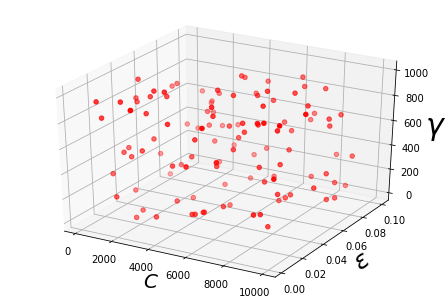






Experiment # 1: done. MSE: 794.598732


Experiment # 2: done. MSE: 794.335595


Experiment # 3: done. MSE: 793.999433


Experiment # 4: done. MSE: 792.971343


Experiment # 5: done. MSE: 795.036533


Experiment # 6: done. MSE: 793.286003


Experiment # 7: done. MSE: 792.021559


Experiment # 8: done. MSE: 794.143427


Experiment # 9: done. MSE: 793.321413


Experiment # 10: done. MSE: 794.895444



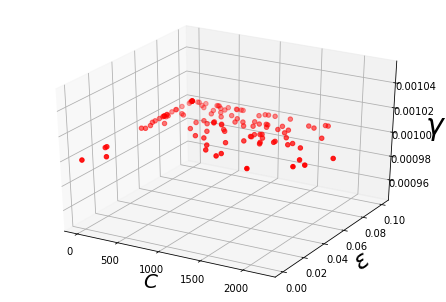






Mean Squared Error for the ARIMA Model:	 2163.507388

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 792.021559

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 929.088441

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 832.303637

Best Configuration Found:

SVR(C=679.4929262752287, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.08284202771219773, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



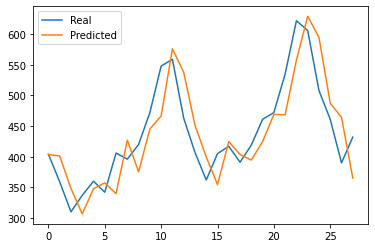


Ensemble Model series` predicitions:



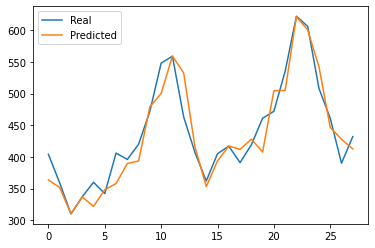


Ensemble Model best Average series` predicitions:



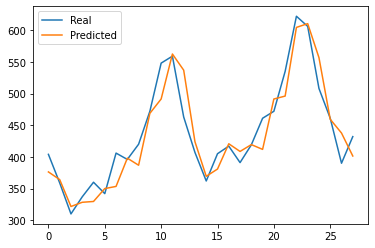


Ensemble Model best Median series` predicitions:



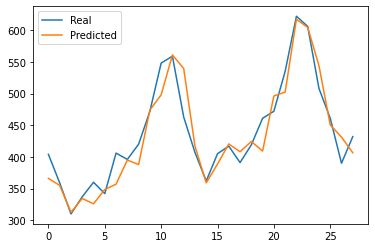






Best Result: Experiment # 7 . Mean Squared Error = 792.021559



In [29]:
pso(120, 100, 3, 1, 10)

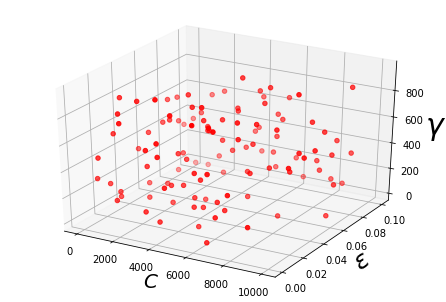






Experiment # 1: done. MSE: 875.744583


Experiment # 2: done. MSE: 793.300073


Experiment # 3: done. MSE: 793.203901


Experiment # 4: done. MSE: 792.666699


Experiment # 5: done. MSE: 793.201283


Experiment # 6: done. MSE: 793.181748


Experiment # 7: done. MSE: 794.098606


Experiment # 8: done. MSE: 794.247654


Experiment # 9: done. MSE: 792.988862


Experiment # 10: done. MSE: 793.472910



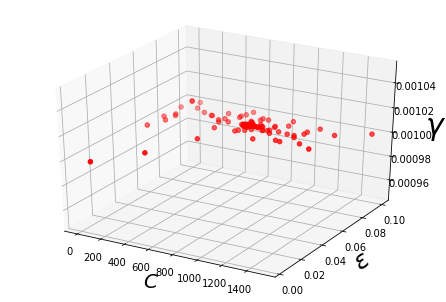






Mean Squared Error for the ARIMA Model:	 2163.507388

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 792.666699

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 809.606634

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 794.360412

Best Configuration Found:

SVR(C=658.5965114802832, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.08231960398027993, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



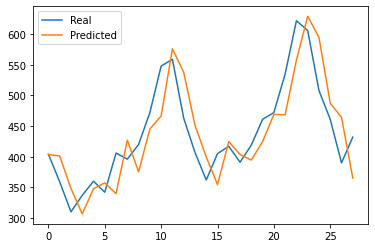


Ensemble Model series` predicitions:



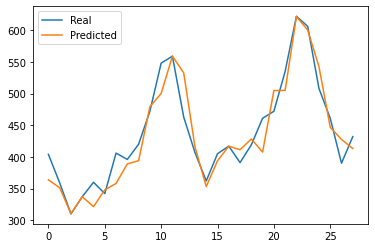


Ensemble Model best Average series` predicitions:



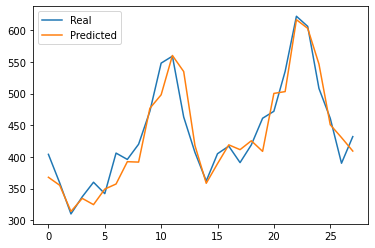


Ensemble Model best Median series` predicitions:



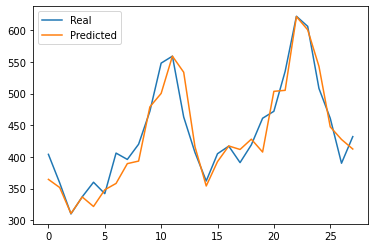






Best Result: Experiment # 4 . Mean Squared Error = 792.666699



In [30]:
pso(120, 100, 3, 0.8, 10)

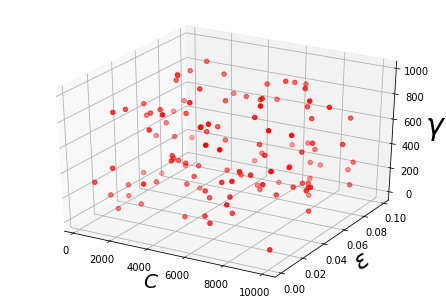






Experiment # 1: done. MSE: 792.635178


Experiment # 2: done. MSE: 792.965795


Experiment # 3: done. MSE: 794.093151


Experiment # 4: done. MSE: 794.257064


Experiment # 5: done. MSE: 794.166269


Experiment # 6: done. MSE: 793.270344


Experiment # 7: done. MSE: 875.408441


Experiment # 8: done. MSE: 689.296497


Experiment # 9: done. MSE: 793.824525


Experiment # 10: done. MSE: 794.012168



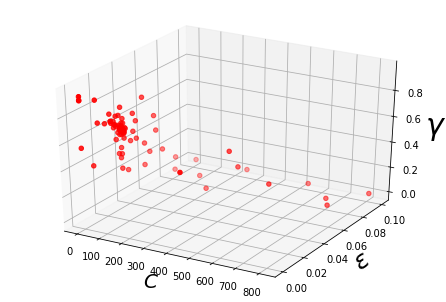






Mean Squared Error for the ARIMA Model:	 2163.507388

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 689.296497

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 758.306902

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 690.459641

Best Configuration Found:

SVR(C=0.9858337424354338, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.03503329848790051, gamma=0.5493988109752003, kernel='rbf',
    max_iter=-1, shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



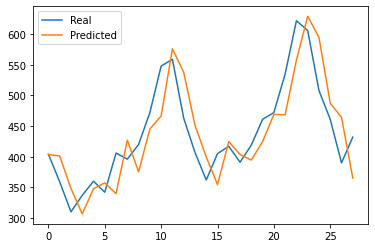


Ensemble Model series` predicitions:



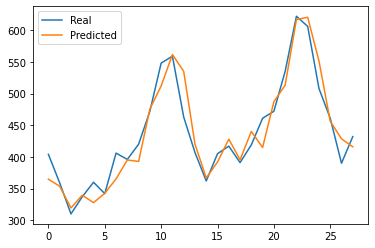


Ensemble Model best Average series` predicitions:



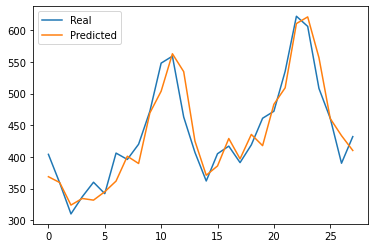


Ensemble Model best Median series` predicitions:



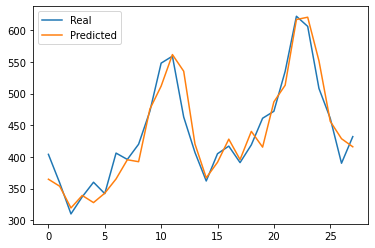






Best Result: Experiment # 8 . Mean Squared Error = 689.296497



In [31]:
pso(120, 100, 3, 0.6, 10)

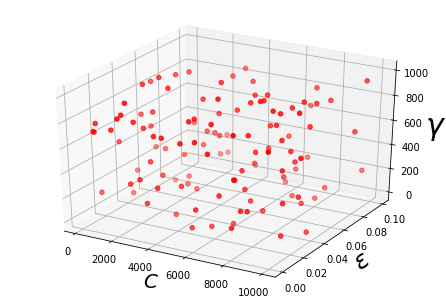






Experiment # 1: done. MSE: 693.935185


Experiment # 2: done. MSE: 776.330795


Experiment # 3: done. MSE: 793.534966


Experiment # 4: done. MSE: 793.595550


Experiment # 5: done. MSE: 875.812008


Experiment # 6: done. MSE: 793.813246


Experiment # 7: done. MSE: 794.585682


Experiment # 8: done. MSE: 794.338322


Experiment # 9: done. MSE: 792.647760


Experiment # 10: done. MSE: 793.379812



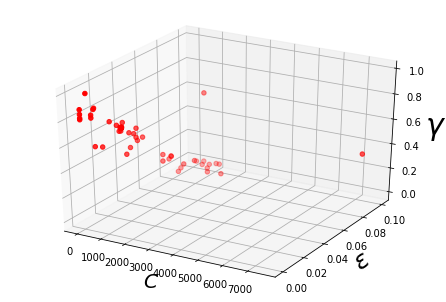






Mean Squared Error for the ARIMA Model:	 2163.507388

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 693.935185

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 738.212616

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 694.417985

Best Configuration Found:

SVR(C=0.8709236812064718, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.03432125771783075, gamma=0.5824153261644717, kernel='rbf',
    max_iter=-1, shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



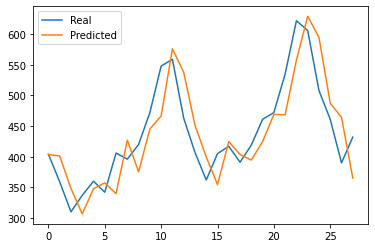


Ensemble Model series` predicitions:



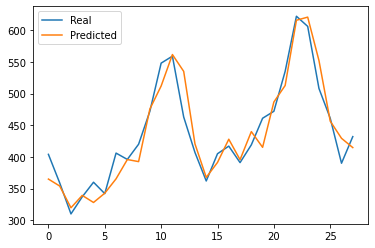


Ensemble Model best Average series` predicitions:



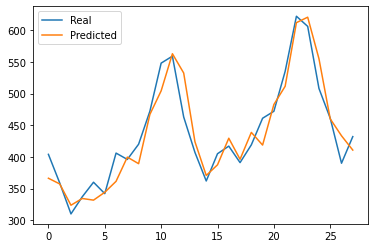


Ensemble Model best Median series` predicitions:



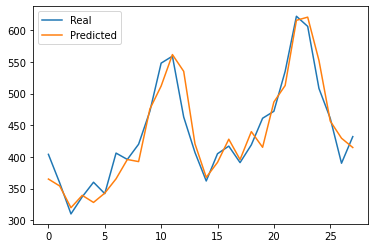






Best Result: Experiment # 1 . Mean Squared Error = 693.935185



In [32]:
pso(120, 100, 3, 0.2, 10)